In [1]:
import re
from string import punctuation

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

for dependency in (
    "stopwords",
    "wordnet",
    "omw-1.4",
):
    nltk.download(dependency)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
dataset = pd.read_csv('data/01-advance.csv')
dataset.head()

,Title,reviews,stars
0,I have been using Advance America for…,I have been using Advance America for years. I...,5
1,I had originally gone to Hoover and…,I had originally gone to Hoover and Homewood w...,5
2,Prompt & Courteous,I call ahead and talk to the manager Rochelle ...,5
3,The girls working here were extremely…,The girls working here were extremely helpful ...,5
4,I always enjoy going to this location…,I always enjoy going to this location the ladi...,5


In [3]:
dataset.shape

(11536, 3)

In [4]:
dataset.isnull().sum()

Title      0
reviews    0
stars      0
dtype: int64

In [5]:
#Selecting Required Columns:
dataset = dataset[['reviews','stars']]

In [6]:
#Review Ratings Distribution:
data = dataset['stars'].value_counts()


<AxesSubplot:>

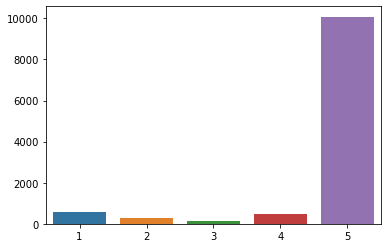

In [7]:
sns.barplot(x=data.index, y=data.values)

In [14]:
text = ""
for i in dataset.reviews:
    text += i
#print(text)

In [15]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'or', 'your', 'here', 'isn', "mustn't", "that'll", 'you', 'in', 'myself', 'such', 'own', "you've", 'nor', 'couldn', "you're", 'ours', 'we', 'each', 'being', 't', 'did', 'once', 'will', 'both', 'were', 'are', 'an', 'o', 'who', 'then', 'all', 'am', 'was', 'wasn', 'themselves', 'herself', 'more', 'aren', 'whom', 'off', 'under', 'which', 'to', 'and', 'again', 'other', "it's", "you'd", 'him', 'have', 'm', 'be', 'too', 'out', 'y', 'until', "weren't", 'very', 'these', 'should', 'they', 'further', 're', "couldn't", 'i', 'over', 'through', 'is', 'that', "doesn't", 'when', 'against', 'after', 'yourselves', 'hasn', 'what', 'himself', 'ourselves', 'hers', 'between', 'her', 'doing', "needn't", 'she', 'but', 'with', 'shouldn', "wasn't", 'won', 'has', 'now', "isn't", 'his', 'its', "should've", 'had', 'into', 'there', 'd', 'this', "you'll", 'a', 'didn', 'than', 'can', "don't", "hasn't", 'doesn', 'needn', 'theirs', 'few', 's', 'before', "shan't", 'our', 'by', "mightn't", 'where', 'above', "haven't", '

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color="black", max_words=300, stopwords=stop_words, max_font_size=50, random_state=42)

"""Display the wordcloud"""

import matplotlib.pyplot as plt

# Generate and display the word cloud

plt.figure(figsize= (15,15)) # Figure initialization
wc.generate(text) # "Calculation" from the wordcloud
plt.imshow(wc) # Display
plt.show()

In [19]:
def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Nettoyer le texte, avec la possibilité de supprimer les stop_words et de lemmatiser le mot
    # Nettoyer le texte
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"http\S+", " link ", text)
    text = re.sub(r"\b\d+(?:\.\d+)?\s+", "", text)  # remove numbers

    # Supprimer la ponctuation du texte
    text = "".join([c for c in text if c not in punctuation])

    # Optionnelle, supprimez les mots vides
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)

    # Optionnelle, raccourcir les mots à leurs racine
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer()
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)

    # Return a list of words
    return text

In [20]:
dataset["cleaned_review"] = dataset["reviews"].apply(text_cleaning)

In [21]:
train_data = dataset["cleaned_review"]

y_target = dataset["stars"].map(
    {1: "Unhappy", 2: "Unhappy", 3: "Happy", 4: "Happy", 5: "Happy"}
)


X_train, X_test, y_train, y_test = train_test_split(train_data, y_target, test_size=0.2)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()

In [23]:
clf = GradientBoostingClassifier(
    n_estimators=100, random_state=44
).fit(X_train, y_train)

y_pred = clf.predict(X_test)

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Ali\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Happy       0.93      0.99      0.96      2128
     Unhappy       0.45      0.13      0.21       180

    accuracy                           0.92      2308
   macro avg       0.69      0.56      0.58      2308
weighted avg       0.89      0.92      0.90      2308



In [25]:
print("Accuracy Train: {}".format(accuracy_score(y_test,y_pred )))

Accuracy Train: 0.919844020797227


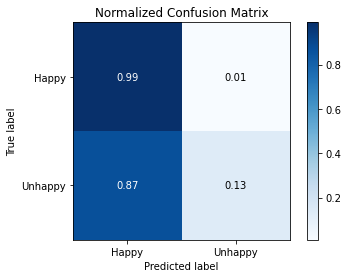

In [26]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()


In [27]:
confusion_matrix = pd.crosstab(
    y_test, y_pred, rownames=["Real Class"], colnames=["Predicted Class"]
)
confusion_matrix

Predicted Class,Happy,Unhappy
Real Class,,
Happy,2099,29
Unhappy,156,24


In [ ]:
import joblib

joblib.dump(clf, "data/sentiment_model_pipeline.pkl")